<a href="https://colab.research.google.com/github/nuriaprol/UFV_Visualizacion/blob/main/EjerciciosClase%20/Clase2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [47]:
from google.colab import files
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

ventas = pd.read_csv("datos_ejercicio_ventas.csv")
ventas.head()


,COUNTRY,SUBBRAND,YEAR,MONTH,SCENARIO,FORECAST,FORECAST_YEAR,AMOUNT
0,Portugal,Lipton (L3),2023,12,AI_forecast,AI_P02F,2023.0,754356.237194
1,Great Britain,Lipton (L3),2023,12,AI_forecast,AI_P10F,2023.0,560030.558029
2,Spain,Pepsi Max (L3),2023,12,AI_forecast,AI_P09F,2023.0,88501.980847
3,Great Britain,7up (L3),2024,12,AI_forecast,AI_P10F,2023.0,363224.511516
4,Hungary,Lipton (L3),2023,9,AI_forecast,AI_P03F,2023.0,396176.120491


Se hixo en el 2023 a gfinales de enero (), la hace para diciembre
horizonte de l mprimer punto hasta el ultimo y ese numero es el horizonte
Todos los países tienen el mismo horizonte de predicción

FORECAST_YEAR = El año en el que hize la predicción
FORECAST = El mes en el que hize la predicción (AI_P02F es Enero, AI_P03F es Febrero, ...)
MONTH Y YEAR = La predicción está hecha para este mes y este año


Queremos calcular el horizonte de predicción para un País y un producto específico.


In [48]:
# Contar los valores NaN por cada columna
nan_por_columna = ventas.isna().sum()

# Contar el total de valores NaN en todo el DataFrame
total_nan = ventas.isna().sum().sum()

# Mostrar los resultados
print("Valores NaN por columna:\n", nan_por_columna)
print("\nTotal de valores NaN en el DataFrame:", total_nan)


Valores NaN por columna:
 COUNTRY            0
SUBBRAND           0
YEAR               0
MONTH              0
SCENARIO           0
FORECAST         900
FORECAST_YEAR    900
AMOUNT             0
dtype: int64

Total de valores NaN en el DataFrame: 1800


In [49]:
# Contar los países únicos
num_countries = ventas['COUNTRY'].unique()

# Contar los productos únicos
num_products = ventas['SUBBRAND'].unique()

# Mostrar los resultados
print(f"Número de países: {len(num_countries)}")
print("Nombres de los países únicos:", num_countries)
print(f"Número de productos: {len(num_products)}")

Número de países: 9
Nombres de los países únicos: ['Portugal' 'Great Britain' 'Spain' 'Hungary' 'Norway' 'Denmark'
 'Netherlands' 'Italy' 'Czech']
Número de productos: 6


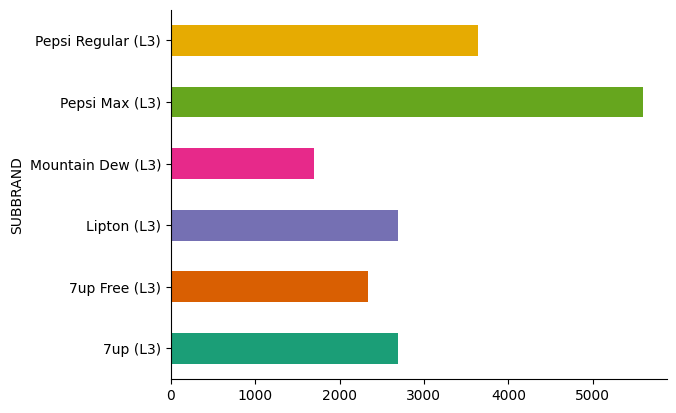

In [50]:
ventas.groupby('SUBBRAND').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

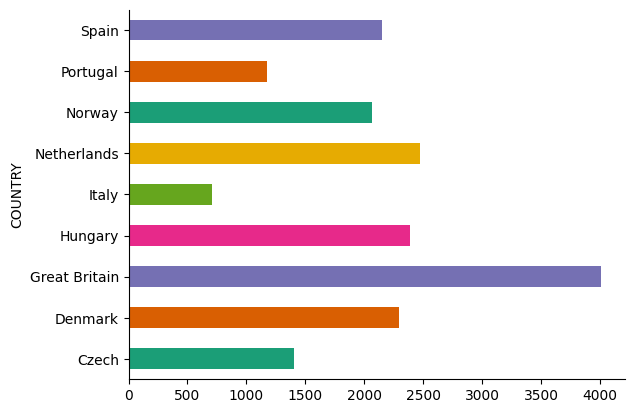

In [51]:
ventas.groupby('COUNTRY').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

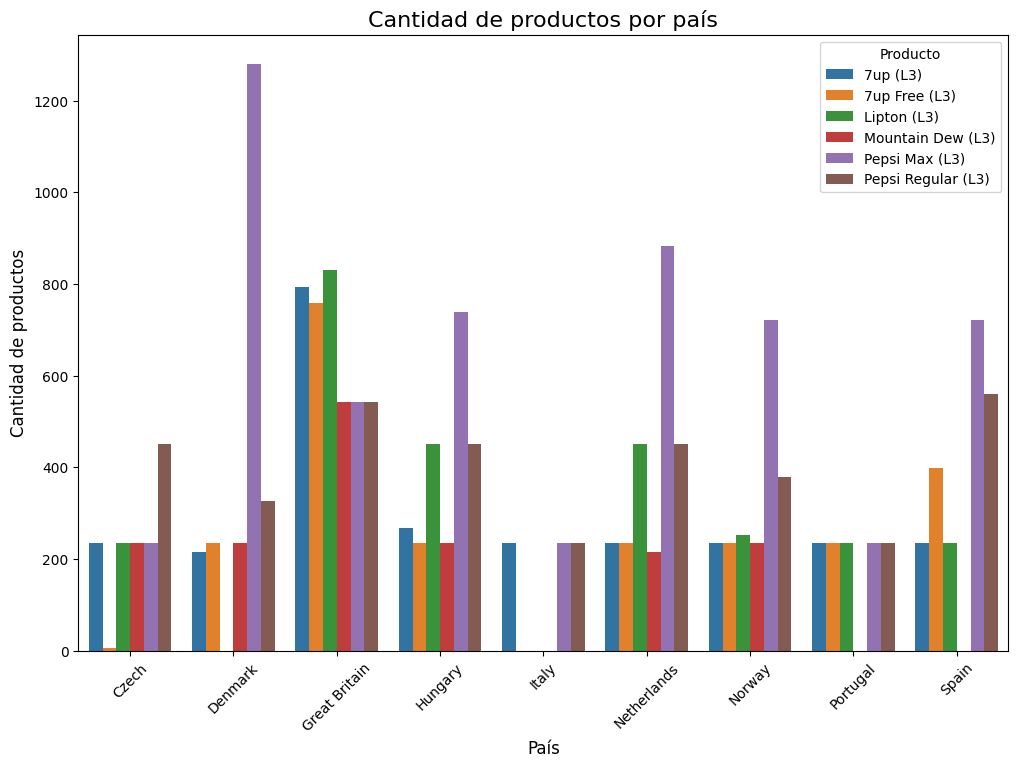

In [52]:
import matplotlib.pyplot as plt
import seaborn as sns

# Agrupar por COUNTRY y SUBBRAND para contar las ocurrencias
productos_por_pais = ventas.groupby(['COUNTRY', 'SUBBRAND']).size().reset_index(name='count')

# Crear el gráfico de barras
plt.figure(figsize=(12, 8))
sns.barplot(x='COUNTRY', y='count', hue='SUBBRAND', data=productos_por_pais)

# Etiquetas y título
plt.title('Cantidad de productos por país', fontsize=16)
plt.xlabel('País', fontsize=12)
plt.ylabel('Cantidad de productos', fontsize=12)

# Mostrar la leyenda y la gráfica
plt.legend(title='Producto')
plt.xticks(rotation=45)
plt.show()


# Horizonte de Previsión

In [53]:
import pandas as pd

horizonte = ventas[ (ventas['COUNTRY'] == 'Portugal') & (ventas['SUBBRAND'] == 'Lipton (L3)') & (ventas['FORECAST'] == 'AI_P02F')].shape[0]
horizonte2 = ventas[ (ventas['COUNTRY'] == 'Czech') & (ventas['SUBBRAND'] == '7up Free (L3)')]
print(horizonte)
print(horizonte2)

18
      COUNTRY       SUBBRAND  YEAR  MONTH SCENARIO FORECAST  FORECAST_YEAR  \
1665    Czech  7up Free (L3)  2024      8   actual      NaN            NaN   
3938    Czech  7up Free (L3)  2024      2   actual      NaN            NaN   
4051    Czech  7up Free (L3)  2024      7   actual      NaN            NaN   
4845    Czech  7up Free (L3)  2024      6   actual      NaN            NaN   
7910    Czech  7up Free (L3)  2024      4   actual      NaN            NaN   
10814   Czech  7up Free (L3)  2024      3   actual      NaN            NaN   
14446   Czech  7up Free (L3)  2024      5   actual      NaN            NaN   

             AMOUNT  
1665   80319.401492  
3938      89.354912  
4051   79302.616007  
4845   58920.810057  
7910   32814.757087  
10814  14906.588661  
14446  57893.829296  
